In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1 

In [13]:
import pandas as pd
#path = 'C:\Users\Leyuan Jiang\Desktop\compustat.zip'   no need, just put file in the same folder
data = pd.read_csv('compustat.zip')
colname = ["sic","datacqtr","cusip","cshoq","saleq","prccq"]
data = data[colname]
data.head()

,sic,datacqtr,cusip,cshoq,saleq,prccq
0,3089.0,1966Q1,000032102,0.219,NaN,NaN
1,3089.0,1966Q2,000032102,0.219,NaN,NaN
2,3089.0,1966Q3,000032102,0.219,NaN,NaN
3,3089.0,1966Q4,000032102,0.219,4.032,NaN
4,3089.0,1967Q1,000032102,0.277,NaN,NaN


In [26]:
data['market cap'] = data['cshoq'] * data['prccq']
data.head()

,sic,datacqtr,cusip,cshoq,saleq,prccq,market cap
0,3089.0,1966Q1,000032102,0.219,NaN,NaN,NaN
1,3089.0,1966Q2,000032102,0.219,NaN,NaN,NaN
2,3089.0,1966Q3,000032102,0.219,NaN,NaN,NaN
3,3089.0,1966Q4,000032102,0.219,4.032,NaN,NaN
4,3089.0,1967Q1,000032102,0.277,NaN,NaN,NaN


For saleq and market cap, compute the following:
Time series mean；Time Series standard deviation；Time Series count of missing values；Time Series ratio of missing values
Aggregate the result in a dataframe

In [29]:
saleq_mean = data["saleq"].dropna().mean()
mktcap_mean = data["market cap"].dropna().mean()
saleq_std = data["saleq"].dropna().std()
mktcap_std = data["market cap"].dropna().std()
saleq_nan = data["saleq"].isna().sum()
mktcap_nan = data["market cap"].isna().sum()
saleq_miss_ratio = saleq_nan/data.shape[0]
mktcap_miss_ratio = mktcap_nan/data.shape[0]

In [37]:
result = pd.DataFrame(data=[[saleq_mean, mktcap_mean],[saleq_std, mktcap_std],[saleq_nan, mktcap_nan],[saleq_miss_ratio, mktcap_miss_ratio]],
                  index=["mean","std","number of missing value","ratio of missing value"],columns=["saleq","mktcap"])
# we can also use pivot-table here 数据透视表
# sales = data.pivot_table(values=["saleq"], index=["datacqtr"], columns=["sic"])
result

,saleq,mktcap
mean,445.150664,2057.473104
std,2679.706576,13202.197457
number of missing value,269498.000000,468276.000000
ratio of missing value,0.148787,0.258530


We can see from the table above that the standard deviation for both variables are extremely large. This may imply that there are outliers for both of them. Next, we try to detect outliers.

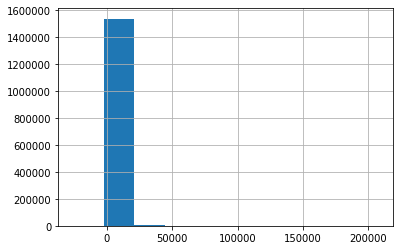

In [39]:
display(data["saleq"].hist())

From histogram, there are several values that are extremely large. 

In [40]:
data["saleq"].describe()

count    1.541801e+06
mean     4.451507e+02
std      2.679707e+03
min     -2.562300e+04
25%      3.210000e+00
50%      2.182500e+01
75%      1.305300e+02
max      2.073073e+05
Name: saleq, dtype: float64

The maximum number is way much larger than 75% quantile number. There exist some extreme large numbers in sales. This can also be illustrated by the boxplot below.

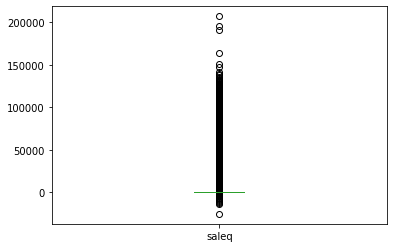

In [42]:
data["saleq"].plot.box()

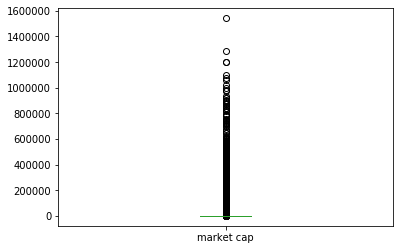

In [43]:
data["market cap"].plot.box()
# other ways to detect outliers: Z score, tukey method

We can conclude from above that both saleq and market cap have several outliers. Those are large values, even 100+ times larger than mean values. This might due to the existence of mega-firms, which are extremely big corporations. Their market cap are far away from normal firms. Also, the fluctuation in global economy and crisis like the one in 2008 can cause extreme changes in saleq data.

## Problem 2

Using the same data in question 1. Compute a panel data for HHI index for all industry, using a 2 digit SIC code.

Choose top 4 industry with the highest average HHI index, plot their time series pattern of HHI in a 2 by 2 figure.

In [49]:
df_HHI = pd.DataFrame(data,columns=["sic","datacqtr","market cap"]).dropna()
df_HHI["2d-sic"] = df_HHI["sic"]/100   # just take 2 digits

industry_cap = df_HHI.groupby(["2d-sic","datacqtr"])["market cap"].sum().reset_index()
industry_cap

,2d-sic,datacqtr,market cap
0,1.00,1967Q4,65.205000
1,1.00,1968Q1,62.617500
2,1.00,1968Q2,109.295875
3,1.00,1968Q3,119.726905
4,1.00,1968Q4,211.665500
...,...,...,...
85848,99.98,2010Q4,16.803540
85849,99.98,2011Q1,18.111600
85850,99.98,2011Q2,20.124000
85851,99.98,2011Q3,19.620900


In [51]:
df_HHI = pd.merge(df_HHI,industry_cap,on=["2d-sic","datacqtr"])
# will generate market cap_x and market cap_y, the first is for company, second is for industry
df_HHI

,sic,datacqtr,market cap_x,2d-sic,market cap_y,market cap
0,3089.0,1970Q3,26.20250,30.89,950.45125,950.45125
1,3089.0,1970Q3,37.07050,30.89,950.45125,950.45125
2,3089.0,1970Q3,719.52750,30.89,950.45125,950.45125
3,3089.0,1970Q3,8.28000,30.89,950.45125,950.45125
4,3089.0,1970Q3,36.18000,30.89,950.45125,950.45125
...,...,...,...,...,...,...
1341701,900.0,2005Q4,17.78355,9.00,17.78355,17.78355
1341702,900.0,2006Q2,21.52225,9.00,21.52225,21.52225
1341703,900.0,2006Q4,31.71570,9.00,31.71570,31.71570
1341704,7359.0,2020Q2,2085.41088,73.59,2085.41088,2085.41088


In [52]:
# Calculate HHI
df_HHI["HHI"] = (df_HHI['market cap_x']/df_HHI["market cap_y"]*100)**2
industry_HHI = df_HHI.groupby(["datacqtr","2d-sic"])["HHI"].sum()
industry_HHI.head()

datacqtr  2d-sic
1962Q1    45.12     10000.000000
          60.20       564.058299
1962Q2    40.11      3013.961261
          45.12     10000.000000
          60.20       543.295514
Name: HHI, dtype: float64

In [54]:
industry_HHI_mean = industry_HHI.groupby(["2d-sic"]).mean() # calculate mean for all periods
industry_HHI_mean = industry_HHI_mean[industry_HHI_mean<10000].sort_values(ascending=False)  
# notice that some HHI are 10000 all the time, meaning there is only 1 company in the industry all the time. we donot want them 
industry_HHI_mean.head()

2d-sic
34.51    9984.447643
40.13    9843.342743
27.32    9631.589490
37.20    9415.444759
81.11    9362.460875
Name: HHI, dtype: float64

Text(0.5, 1.0, 'HHI of industry 37.20')

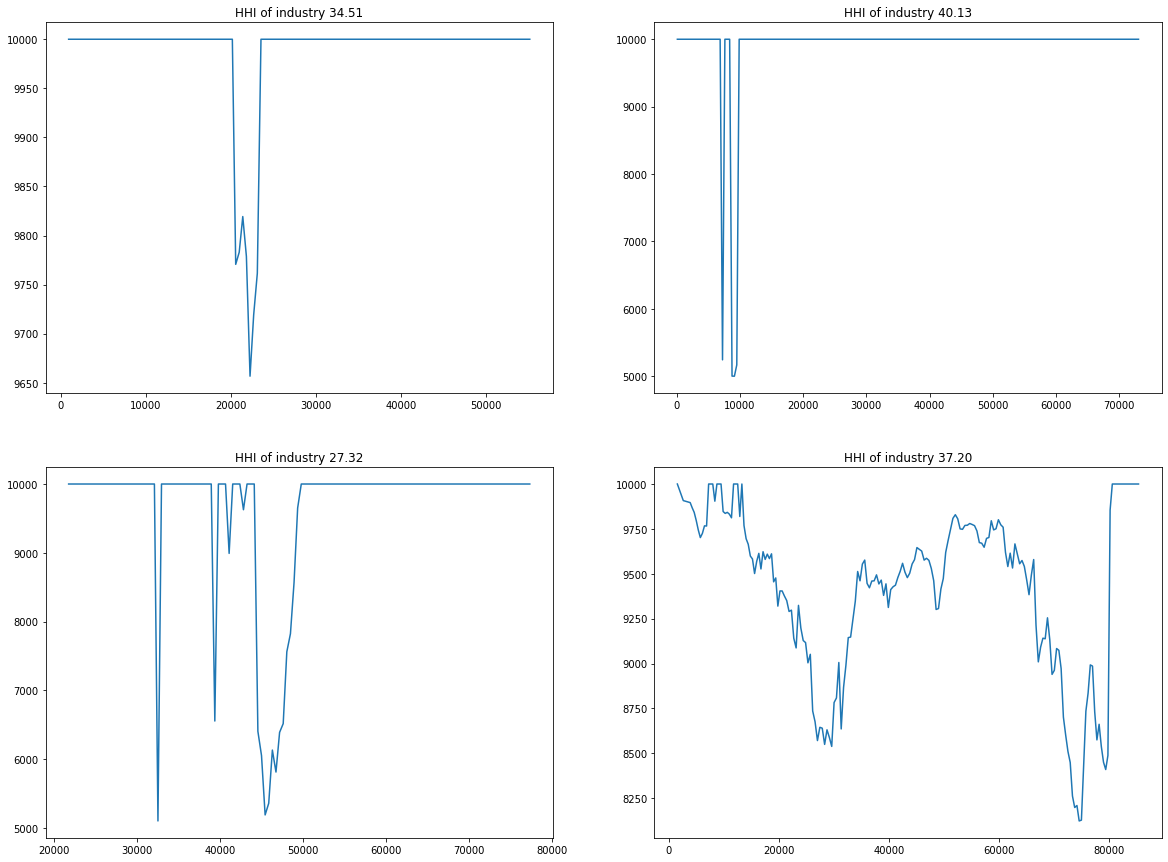

In [64]:
HHI_pd = pd.DataFrame(industry_HHI) # contains time series data of industry HHI
HHI_pd.reset_index(inplace=True)

index_3451 = HHI_pd[HHI_pd["2d-sic"]==34.51]
index_4013 = HHI_pd[HHI_pd["2d-sic"]==40.13]
index_2732 = HHI_pd[HHI_pd["2d-sic"]==27.32]
index_3720 = HHI_pd[HHI_pd["2d-sic"]==37.20]

# plot a 2*2 figure
plt.figure(figsize=(20,15))
ax1 = plt.subplot(2,2,1)
plt.plot(index_3451.index,index_3451["HHI"])
plt.title("HHI of industry 34.51")

ax2 = plt.subplot(2,2,2)
plt.plot(index_4013.index,index_4013["HHI"])
plt.title("HHI of industry 40.13")

ax3 = plt.subplot(2,2,3)
plt.plot(index_2732.index,index_2732["HHI"])
plt.title("HHI of industry 27.32")

ax4 = plt.subplot(2,2,4)
plt.plot(index_3720.index,index_3720["HHI"])
plt.title("HHI of industry 37.20")
